In [3]:
using Base.MathConstants
function fibonacci_search(f, a, b, n; ϵ=0.002)
    s = (1-√5)/(1+√5)
    ρ = 1 / (φ*(1-s^(n+1))/(1-s^n))
    d = ρ*b + (1-ρ)*a
    yd = f(d)
    for i in 1 : n-1
        if i == n-1
            c = ϵ*a + (1-ϵ)*d
        else
            c = ρ*a + (1-ρ)*b
        end
        yc = f(c)
        if yc < yd
            b, d, yd = d, c, yc
        else
            a, b = b, c
        end
        ρ = 1 / (φ*(1-s^(n-i+1))/(1-s^(n-i)))
    end
    return a < b ? (a, b) : (b, a)
end

fibonacci_search (generic function with 1 method)

In [4]:
function bracket_minimum(f, x=0; s=1e-2, k=2.0)
    a, ya = x, f(x)
    b, yb = a + s, f(a + s)
    if yb > ya
        a, b = b, a
        ya, yb = yb, ya
        s = -s
    end

    while true
        c, yc = b + s, f(b + s)
        if yc > yb
            return a < c ? (a, c) : (c, a)
        end
        a, ya, b, yb = b, yb, c, yc
        s *= k
    end
end

bracket_minimum (generic function with 2 methods)

In [31]:
f(x) = sin(x)
a, b = bracket_minimum(f, -3)

(-2.3600000000000003, -0.44000000000000017)

In [32]:
a, b = fibonacci_search(f, a, b, 200)

(-1.5707963364498072, -1.5707963364498072)

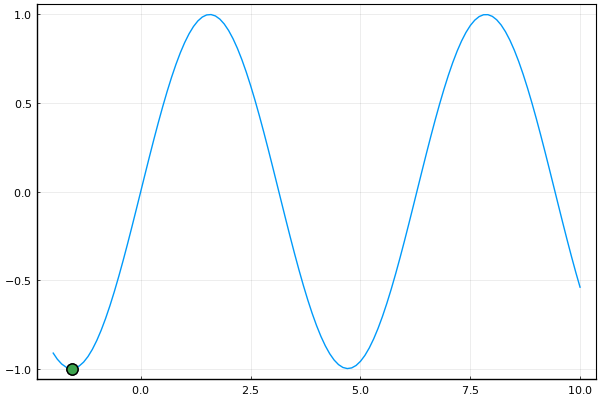

In [33]:
using Plots
pyplot()
x = -2:0.1:10
plot(x, f.(x), label="")
scatter!([a b], [f(a) f(b)], markersize = 8, framestyle = :box, label="")

In [34]:
x_opt = (a + b)/2

-1.5707963364498072